## Information of the dataset


In [1]:
import sys
sys.path.append("..\\..\\src\\")
import my_functions

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "..\\..\\results\\breast_cancer\\EDA\\"

In [3]:
df = pd.read_csv("..\\..\\data\\breast_cancer\\raw\\breast_cancer.csv")

# Rename outcome columns
df['diagnosis'] = df['diagnosis'].astype('category')
df['diagnosis'] = df['diagnosis'].cat.rename_categories({"M":"Malignant", "B":"Benign"})

In [4]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,Malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,Malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


## 1.Exploratory Data Analysis

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isnull().values.any()

True

### 1.1 Target Distribution

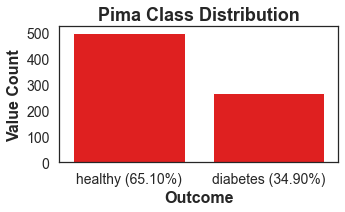

In [28]:
plt.rcParams['figure.figsize'] = [5, 2.5]

# Obtain Percentages
healthy = df['Outcome'].value_counts()[0] / df.shape[0] * 100
diabetes = df['Outcome'].value_counts()[1] / df.shape[0] * 100


# Plot Training
sns.countplot(df['Outcome'], color="red")
plt.xticks((0, 1), ['healthy ({0:.2f}%)'.format(healthy), 'diabetes ({0:.2f}%)'.format(diabetes)], size=14)
plt.yticks(size=14)
plt.ylabel('Value Count', size=16, fontweight="bold")
plt.xlabel("Outcome", size=16, fontweight="bold")
plt.title("Pima Class Distribution", size=18, fontweight="bold")
plt.savefig(path + 'class_distribution.png', dpi=200, bbox_inches = 'tight')

#### Findings target distribution

<ul>
<li>The data is imbalance that is why we can not rely on accuracy as an optimizing metric. </li>
<li>However, it is not heavily imbalance </li>
</ul>

### 1.2 Pairplot

In [72]:
df.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,healthy


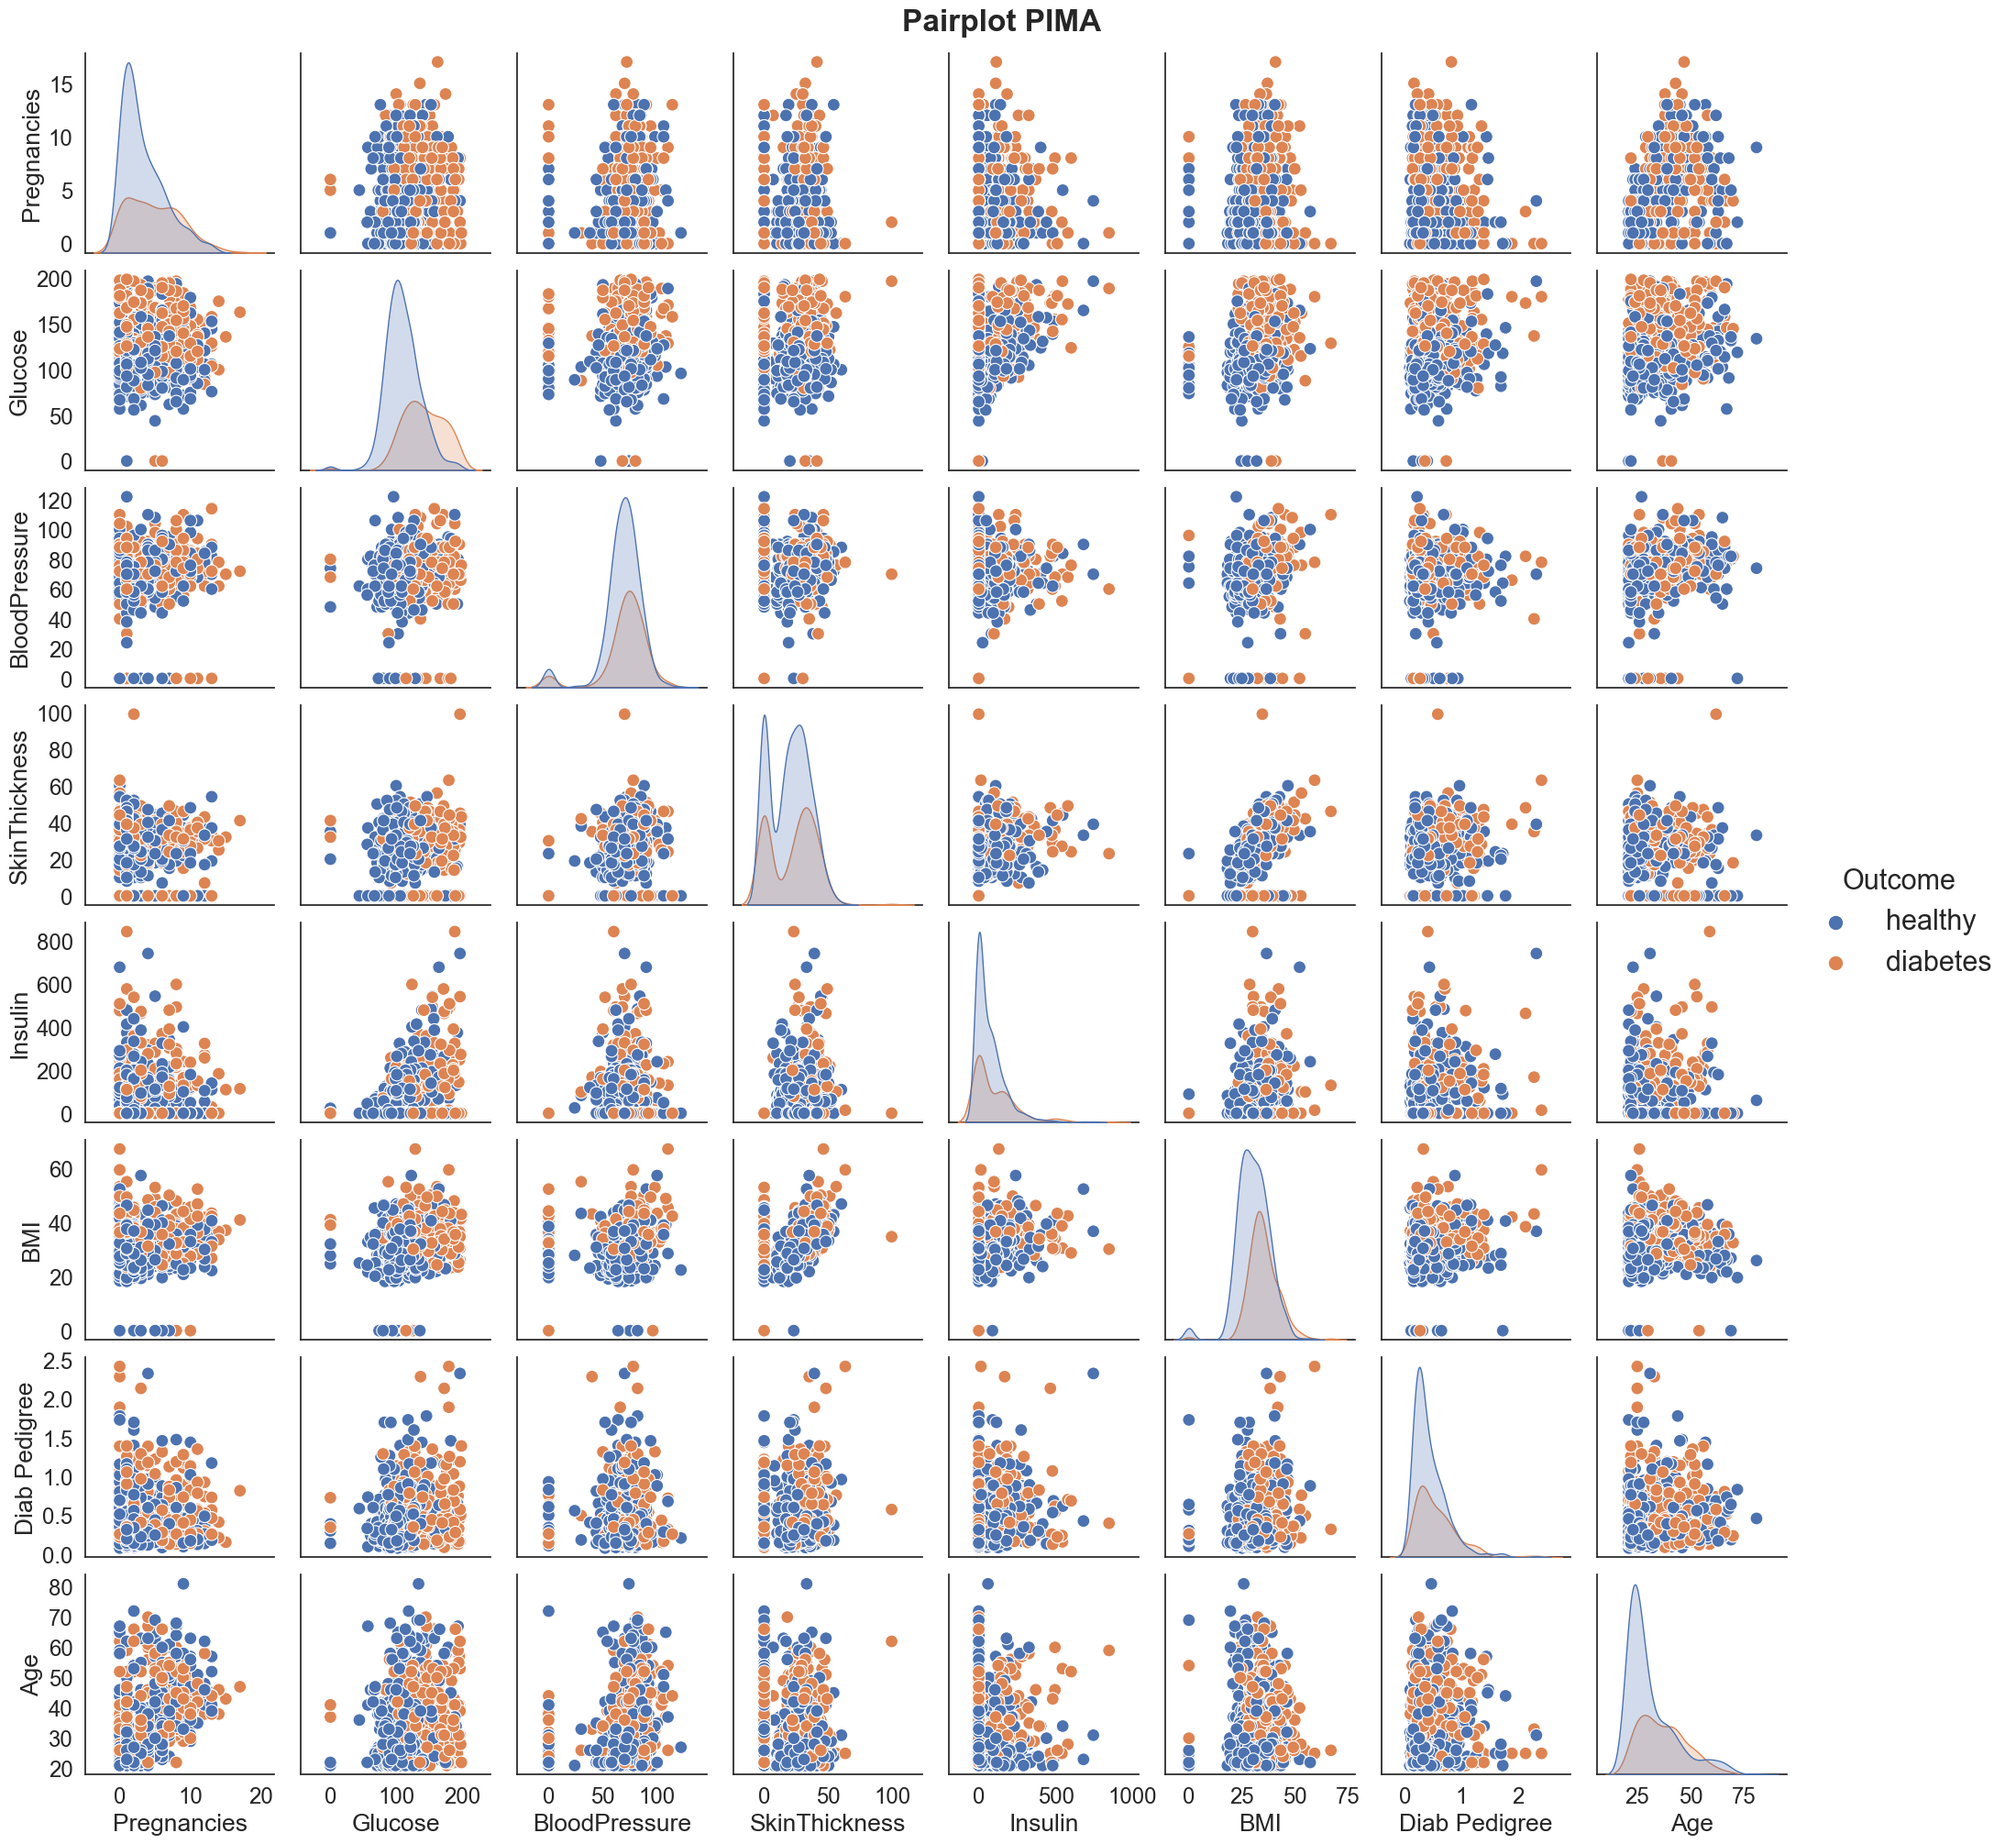

In [21]:
rc = {'axes.labelsize':19,
    'legend.fontsize': 22,
    'legend.title_fontsize': 22.0,
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'lines.markersize': 10
}

with sns.plotting_context(rc=rc):
    g = sns.pairplot(df, hue="Outcome") 
    g.fig.suptitle("Pairplot PIMA", fontsize=24, fontweight="bold", y=1.01)
    plt.savefig(path + 'pairplot.png', dpi=200, bbox_inches = 'tight')

#### Findings  pair plots

- Hay algunos datos en el dataset que no hacen sentido, como que haya un BMI, Glucose, Insulin, SkinThickness de 0.
- Si tienen 0 de insulina tienen diabetes.
- Glucosa 0 



### 1.3 Correlations

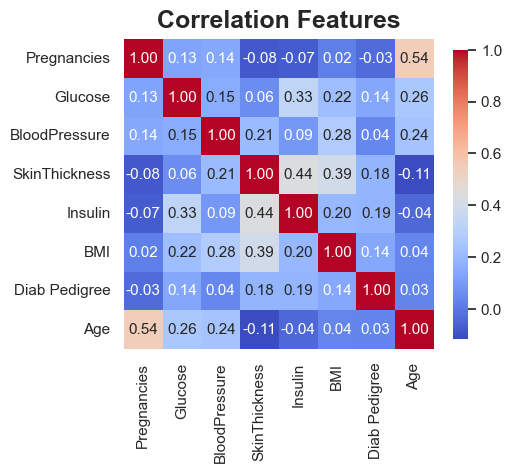

In [24]:
# Whole Data
rc = {'axes.labelsize':22,
}

with sns.plotting_context(rc=rc):
    g = sns.heatmap(df.iloc[:, 0:8].corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 11}, fmt='.2f', cbar_kws={"shrink": 0.75})
    plt.title("Correlation Features", fontsize=18, fontweight="bold", y=1.01)
    plt.savefig(path + 'correlation_plot.png', dpi=200, bbox_inches = 'tight')


#### Findings correlation plot
1. There are not significant correlation between the variables

### 1.4 Missing Data

Text(0.5, 1.0, 'NA Values')

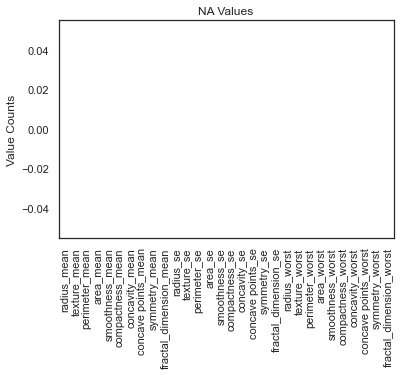

In [8]:
X.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

#### Findings NA values

Check the values that make no sense 

### 1.5 Categorical Data

In [9]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

Text(0.5, 1.0, 'Age')

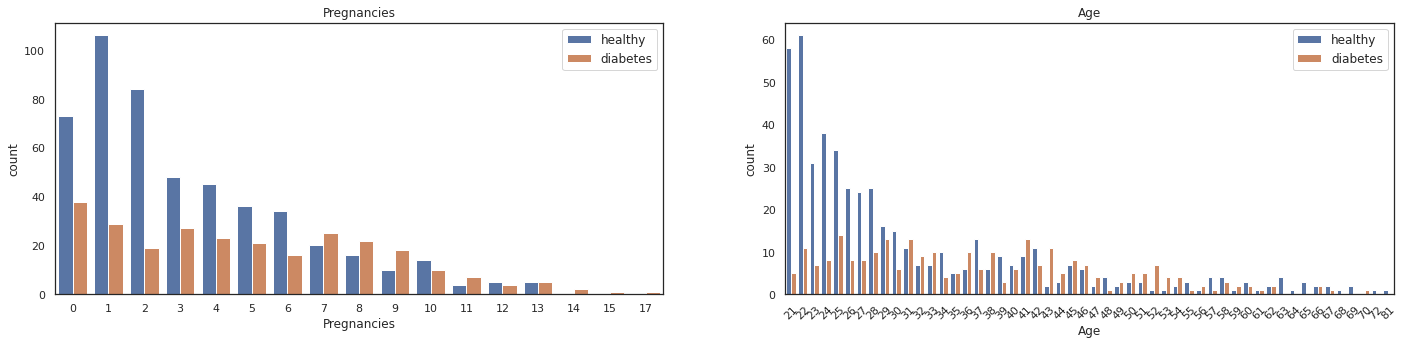

In [10]:
#Categorical Data
plt.rcParams['figure.figsize'] = [24, 5]

# Pregnancies
plt.subplot(1, 2, 1)
sns.countplot(x='Pregnancies', data=df, hue="Outcome")
plt.legend( loc='upper right', prop={'size': 12})
plt.title("Pregnancies")

# Age
plt.subplot(1, 2, 2)
sns.countplot(x='Age', data=df, hue="Outcome")
plt.legend( loc='upper right', prop={'size': 12})
plt.xticks(rotation = 45) 
plt.title("Age")


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

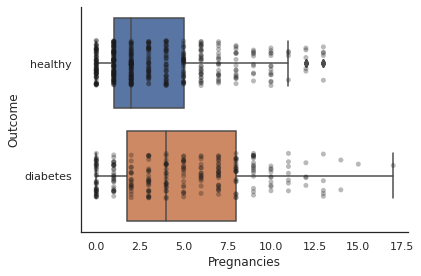

In [11]:
# make boxplot with Catplot
sns.catplot(x='Pregnancies', 
            y='Outcome',
            kind="box",
            data=df,
            height=4,
            aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Pregnancies', 
              y='Outcome',
              data=df,
              alpha=0.3,
              jitter=0.2,
              color='k')

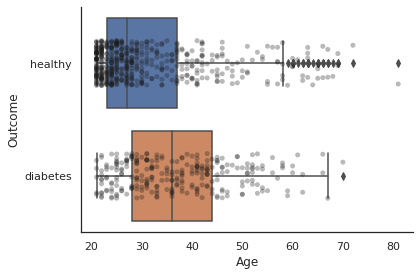

In [12]:
# make boxplot with Catplot
sns.catplot(x='Age', 
            y='Outcome',
            kind="box",
            data=df,
            height=4,
            aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Age', 
              y='Outcome',
              data=df,
              alpha=0.3,
              jitter=0.2,
              color='k');

#### Findings Categorical Data

1. The majority of healthy people is less than 30 years old.
2. The class imbalance changes with the number of pregnancies

### 1.6 Continuos Data

#### 1.6.1 Density Plots

In [13]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,healthy


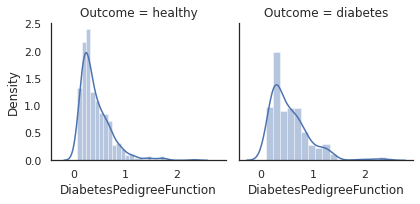

In [14]:
# DiabetesPedigreeFunction
g = sns.FacetGrid(df, col='Outcome')
g = g.map(sns.distplot, 'DiabetesPedigreeFunction')

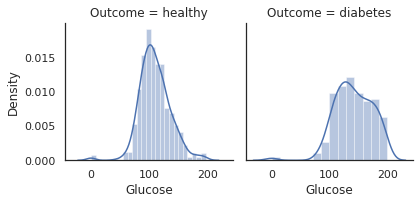

In [15]:
# Glucose
g = sns.FacetGrid(df, col='Outcome')
g = g.map(sns.distplot, "Glucose")

#### 1.6.1 Outliers

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

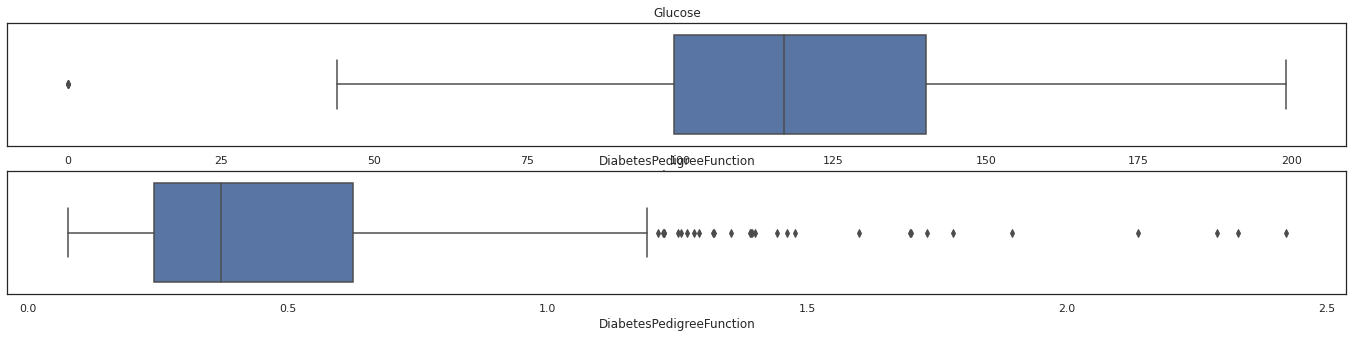

In [16]:
# Glucose
plt.subplot(2,1,1)
sns.boxplot(df["Glucose"])
plt.title("Glucose")

# DiabetesPedigreeFunction
plt.subplot(2,1,2)
sns.boxplot(df["DiabetesPedigreeFunction"])
plt.title("DiabetesPedigreeFunction")

#### Findings Continuos  Data

1. There are some outliers in DiabetesPedigreeFunction

## 2. Preprocesamiento

### 2.1 Quitar valores sin sentido

<Figure size 1728x360 with 0 Axes>

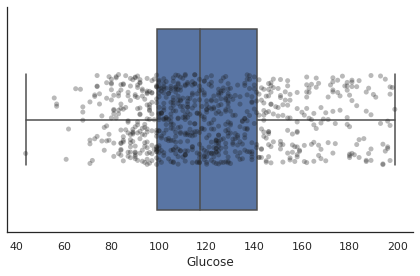

<Figure size 1728x360 with 0 Axes>

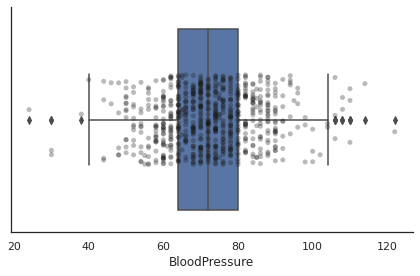

<Figure size 1728x360 with 0 Axes>

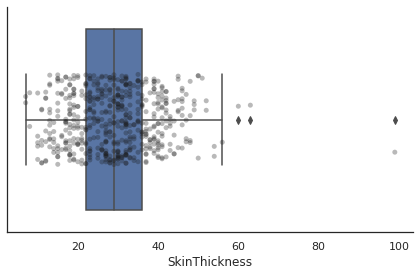

<Figure size 1728x360 with 0 Axes>

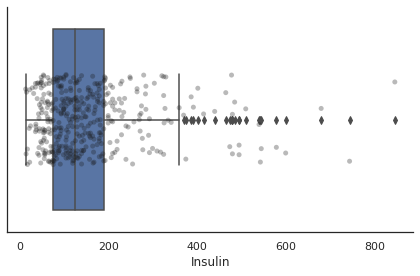

<Figure size 1728x360 with 0 Axes>

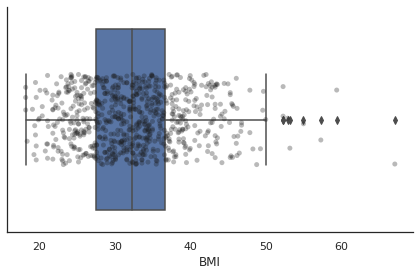

<Figure size 1728x360 with 0 Axes>

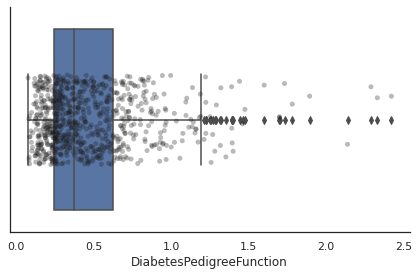

In [18]:
for column in df[columns_NA]:
    plt.figure()
    # make boxplot with Catplot
    sns.catplot(x= column, 
                kind="box",
                data=df,
                height=4,
                aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=column, 
                data=df,
                alpha=0.3,
                jitter=0.2,
                color='k')

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
df.isnull().values.any()

True

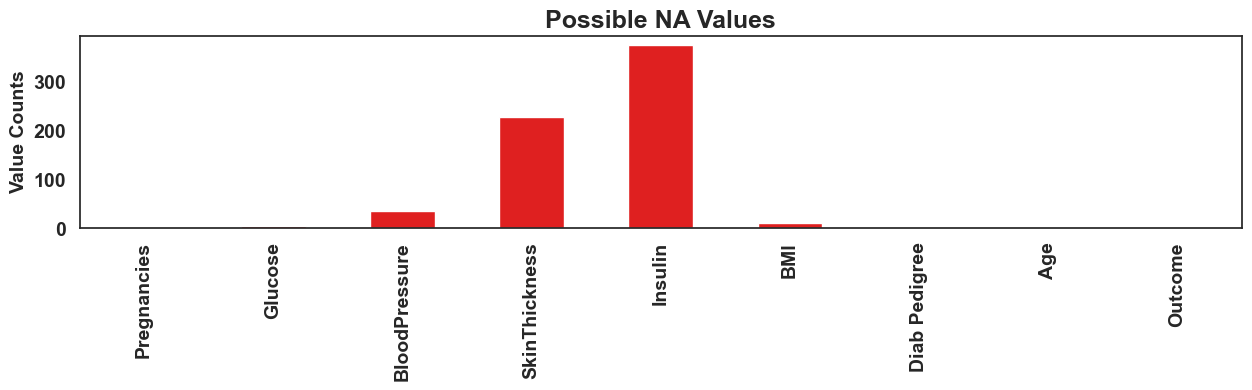

In [41]:
plt.rcParams['figure.figsize'] = [15, 2.5]
df.isna().sum().plot.bar(color="#DF2020")
plt.ylabel("Value Counts", fontsize=14, fontweight="bold")
plt.title("Possible NA Values", fontsize=18, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")
plt.xticks(fontsize=14, fontweight="bold")
plt.savefig(path + 'NA_values.png', dpi=200, bbox_inches = 'tight')

### 2.2 Educated Guess NA values

The NA values will be filled with the median

In [22]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

Text(0.5, 1.0, 'NA Values')

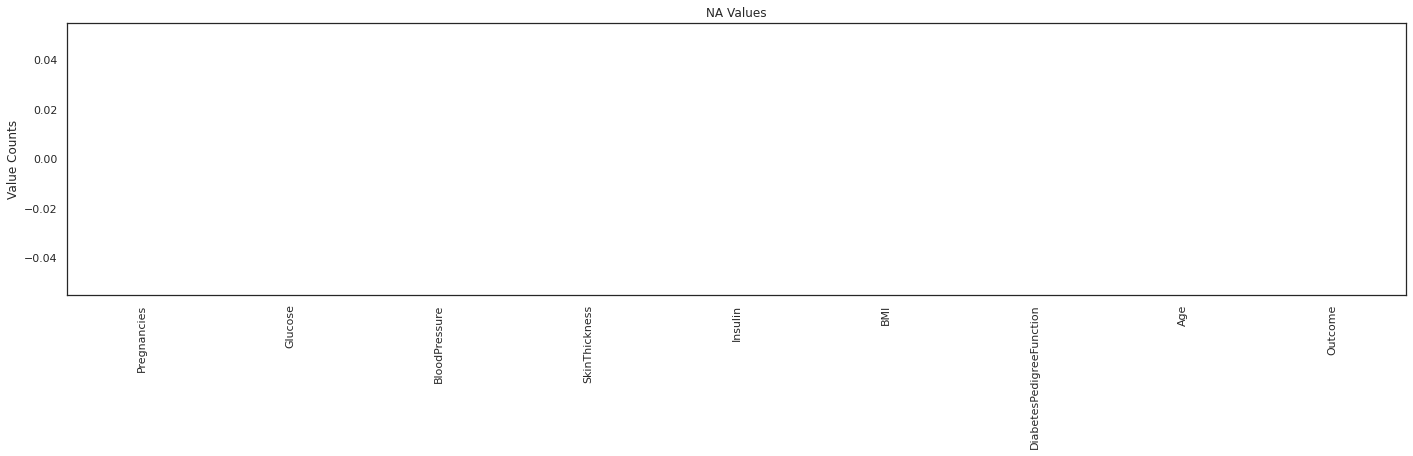

In [23]:
df.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

### 2.3 Standard Scaler

In [11]:
y = df.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis = 1 )

In [12]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [13]:
# Initiate Standard Scalaer
scaler = StandardScaler()

# Scale variables
X_scaled = scaler.fit_transform(X)

In [25]:
varnames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X_scaled = pd.DataFrame(X_scaled, columns = varnames)

# Append target to variable
df_scaled = X_scaled.join(df["Outcome"])

In [26]:
# Split into train, validation and test set
np.random.seed(1)
train, validate, test = np.split(df_scaled.sample(frac=1, random_state=1), [int(.7*len(df_scaled)), int(.85*len(df_scaled))])

In [66]:
# Creating column base on split
train["split"] = "training"
validate["split"] = "validation"
test["split"] = "testing"

# appends df
df_split = train.append(validate)
df_split = df_split.append(test)

In [37]:
# Write csv of scaled variables
# df_split.to_csv("../data/preprocess/pima_standard_scaler.csv")

In [38]:
df_split.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.387779e-17,-5.059610e-18,2.746646e-18,-1.908196e-16,3.079134e-17,2.634792e-16,2.456079e-16,1.989150e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [39]:
df_split.isnull().values.any()

False

## 3. Split Division with  Standard Scaler

In [3]:
df = pd.read_csv("../../data/preprocess/pima_standard_scaler.csv")

In [4]:
df.head(2)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,split
0,285,0.936914,0.471547,0.133453,-0.353773,-0.065702,-0.939527,0.528894,1.511083,healthy,training
1,101,-0.844885,0.964669,-1.024647,-0.012301,-0.181541,-0.924973,-0.884521,-0.956462,healthy,training


<AxesSubplot:xlabel='Outcome', ylabel='count'>

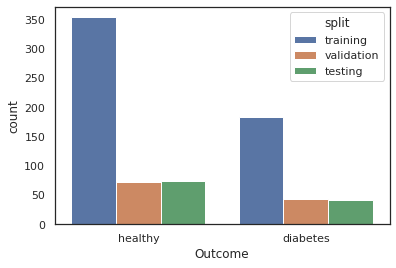

In [10]:
sns.countplot(data=df,x="Outcome", hue="split" )

In [31]:
print(df[df["split"]=="training"]["Outcome"].value_counts()[1]/len(df[df["split"]=="training"]))
print(df[df["split"]=="training"]["Outcome"].value_counts()[0]/len(df[df["split"]=="training"]))

0.3407821229050279
0.659217877094972


In [32]:
print(df[df["split"]=="validation"]["Outcome"].value_counts()[1]/len(df[df["split"]=="validation"]))
print(df[df["split"]=="validation"]["Outcome"].value_counts()[0]/len(df[df["split"]=="validation"]))

0.3739130434782609
0.6260869565217392


In [33]:
print(df[df["split"]=="testing"]["Outcome"].value_counts()[1]/len(df[df["split"]=="testing"]))
print(df[df["split"]=="testing"]["Outcome"].value_counts()[0]/len(df[df["split"]=="testing"]))

0.3620689655172414
0.6379310344827587


## 4. Stratified Split

In [5]:
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis = 1 )
y = df.diagnosis

In [6]:
# Initiate Standard Scalaer
scaler = StandardScaler()

# Scale variables
X_scaled = scaler.fit_transform(X)

In [7]:
varnames = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X_scaled = pd.DataFrame(X_scaled, columns = varnames)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

In [9]:
# Training
X_train["diagnosis"] = y_train
X_train["split"] = "train"

# Testing
X_test["diagnosis"] = y_test
X_test["split"] = "test"

# Merge traing and test
df = X_train.append(X_test)

In [11]:
print(df[df["split"]=="train"]["diagnosis"].value_counts()[1]/len(df[df["split"]=="train"]))
print(df[df["split"]=="train"]["diagnosis"].value_counts()[0]/len(df[df["split"]=="train"]))

0.37362637362637363
0.6263736263736264


In [12]:
print(df[df["split"]=="test"]["diagnosis"].value_counts()[1]/len(df[df["split"]=="test"]))
print(df[df["split"]=="test"]["diagnosis"].value_counts()[0]/len(df[df["split"]=="test"]))

0.3684210526315789
0.631578947368421


In [13]:
df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,split
195,-0.345728,-0.688730,-0.388796,-0.393877,-1.206274,-0.960480,-0.628619,-0.648697,0.063458,-0.868652,...,-0.490013,-0.492186,-0.993698,-0.659455,-0.459548,-0.491153,0.199382,-0.801081,Benign,train
560,-0.021952,1.829157,-0.024262,-0.154973,0.208495,0.156521,-0.554670,-0.151647,-1.002617,-0.154180,...,-0.210324,-0.305671,-0.362461,-0.177261,-0.669679,-0.149315,-1.052780,-0.040776,Benign,train


In [15]:
df.to_csv("..\\..\\data\\breast_cancer\\preprocess\\breast_cancer_standard_scaler.csv")